# Support VectorMachine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split

Text(0, 0.5, '특성 1')

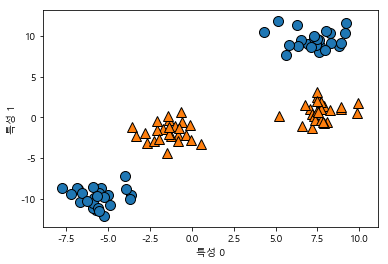

In [2]:
X, y = datasets.make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

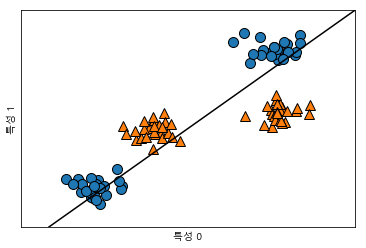

In [6]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


Text(0.5, 0, '특성1 ** 2')

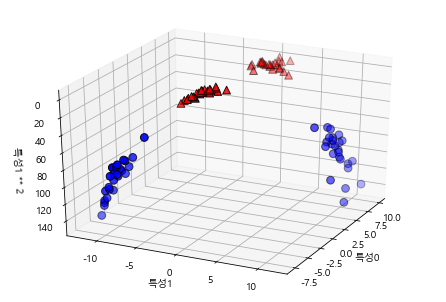

In [7]:
# 두 번째 특성을 제곱하여 추가한다.
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y==0 인 포인트를 먼저 그리고 그다음 y==1 인 포인트를 그린다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

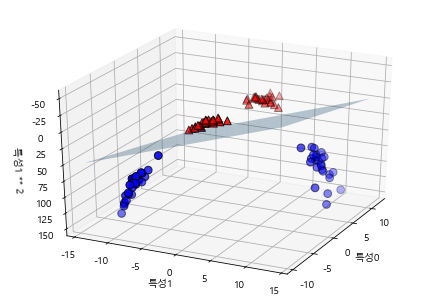

In [8]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

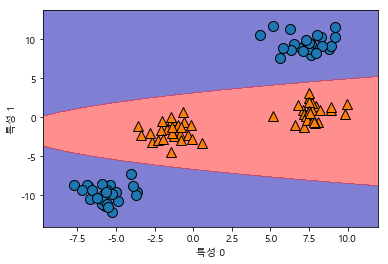

In [10]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 파라미터

In [11]:
from sklearn.svm import SVC

# 가우시안 커널: radial basic function
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = "rbf", C=10, gamma=0.1).fit(X, y)

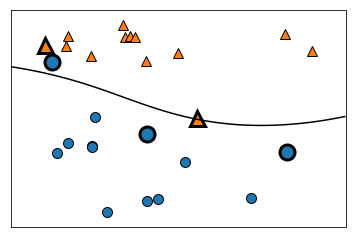

In [15]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

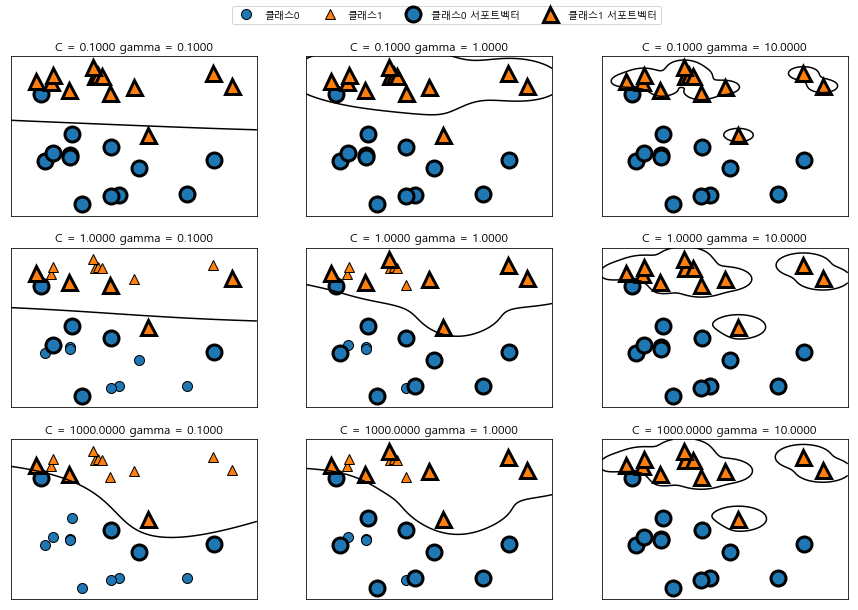

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(['클래스0', '클래스1', '클래스0 서포트벡터', '클래스1 서포트벡터'], ncol=4, loc=(.9, 1.2))

## 붓꽃 데이터를 이용한 SVM

In [21]:
iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [23]:
model = SVC().fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
print("훈련용 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트용 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련용 정확도 : 0.971
테스트용 정확도 : 0.978


## 비만 지수 분류

In [33]:
import random

def calc_bmi(h, w):
    bmi = w / (h/100)**2
    
    if bmi < 18.5:
        return "thin"
    
    if bmi < 25:
        return "normal"
    
    return "fat"

In [34]:
fp = open("data/bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\r\n")

cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120, 220)
    w = random.randint(30, 100)
    label = calc_bmi(h, w)
    
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))

fp.close()
print("OK", cnt)

OK {'thin': 7259, 'normal': 4724, 'fat': 8017}


In [35]:
tbl = pd.read_csv("data/bmi.csv")
tbl.head()

,height,weight,label
0,168,89,fat
1,156,56,normal
2,193,80,normal
3,175,76,normal
4,123,68,fat


In [36]:
label = tbl["label"]
w = tbl["weight"]/100
h = tbl["height"]/200

In [37]:
wh = pd.concat([w, h], axis=1)
wh.head()

,weight,height
0,0.89,0.840
1,0.56,0.780
2,0.80,0.965
3,0.76,0.875
4,0.68,0.615


In [38]:
X_train, X_test, y_train, y_test = train_test_split(wh, label)

In [39]:
clf = SVC().fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
predict = clf.predict(X_test)

In [44]:
print("훈련용 정확도 : {:.3f}".format(clf.score(X_train, y_train)))
print("테스트용 정확도 : {:.3f}".format(clf.score(X_test, y_test)))

from sklearn import metrics
cl_report = metrics.classification_report(y_test, predict)
print("레포트 : \n", cl_report)

훈련용 정확도 : 0.990
테스트용 정확도 : 0.990
레포트 : 
               precision    recall  f1-score   support

         fat       1.00      0.99      1.00      1959
      normal       0.97      0.99      0.98      1220
        thin       0.99      0.99      0.99      1821

   micro avg       0.99      0.99      0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



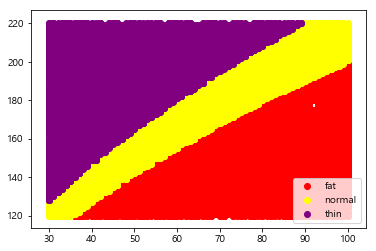

In [48]:
# 그래프 그리기
tbl = pd.read_csv("data/bmi.csv", index_col=2)
tbl.head()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"], b["height"], c=color, label = lbl)
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend()
plt.savefig("data/bmi_result.png")

## 유방암 데이터셋을 활용한 SVM

In [83]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer() # 569개의 데이터(악성 212개, 양성 357개), 30개의 특성

In [84]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [85]:
svc = SVC().fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [86]:
print("훈련용 정확도 : {:.3f}".format(svc.score(X_train, y_train)))
print("테스트용 정확도 : {:.3f}".format(svc.score(X_test, y_test)))

훈련용 정확도 : 1.000
테스트용 정확도 : 0.629


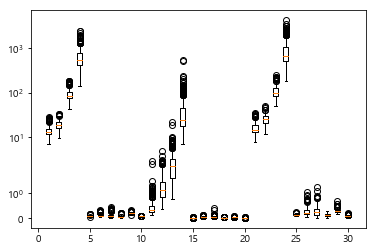

In [71]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")

In [87]:
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [103]:
# 특성별 최소값 구하기
min_on_training = X_train.min(axis=0)
min_on_testing = X_test.min(axis=0)
# 특성별 범위 구하기(최대값 - 최소값)
range_on_training = (X_train - min_on_training).max(axis=0)
range_on_testing = (X_test - min_on_testing).max(axis=0)
# 스케일 조정
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_testing) / range_on_testing
print("특성별 최소값 : ", X_train_scaled.min(axis=0))
print("특성별 최대값 : ", X_train_scaled.max(axis=0))
print("특성별 최소값 : ", X_test_scaled.min(axis=0))
print("특성별 최대값 : ", X_test_scaled.max(axis=0))

특성별 최소값 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값 :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
특성별 최소값 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값 :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [94]:
svc = SVC().fit(X_train_scaled, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [95]:
print("훈련용 정확도 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트용 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련용 정확도 : 0.948
테스트용 정확도 : 0.951


In [96]:
svc = SVC(C=1000).fit(X_train_scaled, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [97]:
print("훈련용 정확도 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트용 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련용 정확도 : 0.988
테스트용 정확도 : 0.804


## 농구선수 포지션 예측을 위한 SVM

In [100]:
df = pd.read_csv("data/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [102]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

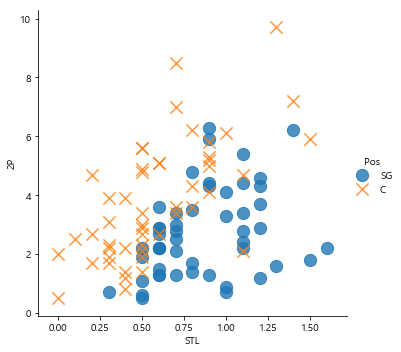

In [105]:
# 스틸, 2점슛

sns.lmplot('STL', '2P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o", "x"], hue="Pos")

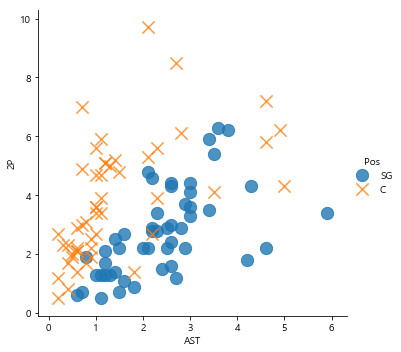

In [106]:
# 어시스트, 2점슛

sns.lmplot('AST', '2P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o", "x"], hue="Pos")

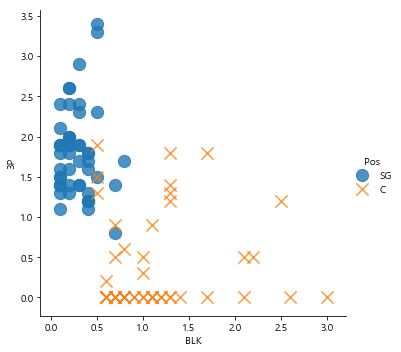

In [107]:
# 블로킹, 3점슛
sns.lmplot('BLK', '3P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o", "x"], hue="Pos")

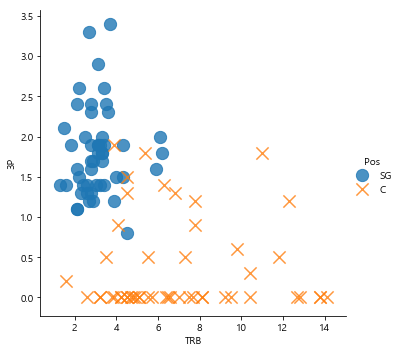

In [108]:
# 리바운드, 3점슛
sns.lmplot('TRB', '3P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o", "x"], hue="Pos")

In [114]:
df.drop(["2P", "AST", "STL"], axis=1, inplace=True)

In [122]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [123]:
train, test = train_test_split(df, test_size=0.2)

In [124]:
train.shape[0]
test.shape[0]

20

In [126]:
# 직렬화
import pickle

with open("data/basketball_train.pkl", "wb") as train_data:
    pickle.dump(train, train_data)
    
with open("data/basketball_test.pkl", "wb") as test_data:
    pickle.dump(test, test_data)

In [ ]:
#svm에서 최적의 파라미터 찾기